In [89]:
import plotnine
import os
import pandas as pd
from plotnine import *
import numpy as np
pathresults = "../results/"
hW95 = "failedLoopdumux_10c9.5_20mn_0s_1_100/"#"noAdsorptiondumux_10c00dx00010plant20k_9.5_60mn_0s_1_100/" #"dx_2000plant100k_9.5_30mn_0s_7_500/" 
lW95B = "failedLoopdumux_10c12.5_20mn_0s_1_100/"#"dx00010plant20k_9.5_30mn_0s_121_100/"#"dx0010plant20k_9.5_10mn_0s_7_1000/"# "dx_2000plant100k_9.5_30mn_0s_7_1000/" 
lW95BB ="failedLoopdumux_10c9.5_5mn_0s_1_1000/"# "newGIdSetdx0010plant20k_9.5_2mn_0s_121_1000/"#"dx_2000plant100k_9.5_30mn_0s_7_5000/" 
lW95CC ="css2dx_2dumux_10c39.5_20mn_0s_1_1000/" 
lW95C = "dx_2000plant100k_9.5_1mn_0s_7_14500/" 
#lW95CC = "11plant100k_9.5_0mn_1s_7_5000/" 
data_file_delimiter = ","

In [60]:

def getVal(mypath, filename, header="infer",names = None):
    fullpath = pathresults +mypath+filename
    if names is None:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header)
    else:
        cst = pd.read_csv(fullpath,delimiter=data_file_delimiter, header = header, names = names)
    return cst
 
def getValAll(mypath, useIter = True):
    if useIter:
        err = getVal(mypath,"fpit_error.csv" )#fpit_error
    else:
        err = getVal(mypath,"N_error.csv" )
        
    colN = list(["\u0394\u03C8x", "\u0394Vw_1DS", "\u0394Vw_3DS", "\u0394C_1DS", "\u0394C_3DS", 
                 #"errRxPlant", "errW1ds", "errW3ds","errC1ds", "errC3ds",
                    "delete_SinkLim3DS","delete_SinkLim1DS", "delete_OutLim1DS","delete_InOutBC_Cdiff",
                 #"max(r.SinkLim3DS)","max(r.SinkLim1DS)","max(abs(r.OutLim1DS))","max(abs(r.InOutBC_Cdiff))",
                 "delete_maxDiff_Vw_1DS_3DS", 
                 # "max(r.maxDiff1d3dCW_abs)",
           "\u0394\u03C8rsi", "delete_maxDiff1d3dCW_absBU", 
                 # "errWrsi", "maxDiff1d3dCW_absBU",
                    "Err_Vw_3DS", "delete_bulkMassErrorWater_absLim",
                 #"bulkMassErrorWater_abs","bulkMassErrorWater_absLim",
                    "delete_rhizoMassWError_absLim","Err_Vw_1DSabs",
                 #"rhizoMassWError_absLim","rhizoMassWError_abs",
                  "Err_C_3DS_plant",  "Err_C_3DS_rhizo", 
                 #"bulkMassErrorC_abs","bulkMassCErrorPlant",
                 "delete_Err_C_1DSabsLim","Err_C_1DSabs",
                 # "rhizoMassCError_absLim","rhizoMassCError_abs",
                    "\u0394_BCWin_1DS", "\u0394_BCWout_1DS","\u0394QW_3DS",
                 # "sum(abs(diffBCS1dsFluxIn))", "sum(abs(diffBCS1dsFluxOut))","sum(abs(diffouter_R_bc_wat))",
                    "\u0394_BCsolin_1DS", "\u0394_BCmucilout_1DS","\u0394QC_3DS",
                 # "sum(abs(diffBCS1dsFluxOut_sol))","sum(abs(diffBCS1dsFluxOut_mucil))","sum(abs(diffouter_R_bc_sol))",
                    "delete_diff1d3dCurrant","Err_Vw_1DSrel",'delete_err'])
     #"diff1d3dCurrant","rhizoMassWError_rel",'err'

    err.set_axis(colN, axis="columns", inplace=True)
    err = err.drop(columns=["delete_SinkLim3DS","delete_SinkLim1DS", 
                            "delete_OutLim1DS","delete_InOutBC_Cdiff",
                          "delete_maxDiff_Vw_1DS_3DS",
                            "delete_maxDiff1d3dCW_absBU", 
                    "delete_bulkMassErrorWater_absLim",
                            "delete_rhizoMassWError_absLim", 
                            "delete_Err_C_1DSabsLim",
                    "delete_diff1d3dCurrant",'delete_err'])
    
    
        
    if not useIter:
        tt = getVal(mypath, "time.txt")
        err['time'] = tt.iloc[:,0]
        
        headername = np.array(["V"+str(i) for i in range(18)])
        se1d3d = getVal(mypath,"sumErrors1ds3ds.csv" , header =None, names = headername )
        # se1d3d = se1d3d.iloc[:,[0,9]]
        #err["sumDVw_1D3Dabs"] = se1d3d.iloc[:,0]
        err["sumDVw_1D3Drel"] = se1d3d.iloc[:,9]
        
        #err["sumDc1_1D3Dabs"] = se1d3d.iloc[:,1]
        err["sumDc1_1D3Drel"] = se1d3d.iloc[:,10]
        #err["sumDc2_1D3Dabs"] = se1d3d.iloc[:,2]
        err["sumDc2_1D3Drel"] = se1d3d.iloc[:,11]
        
        #err["sumDc3_1D3Dabs"] = se1d3d.iloc[:,3]
        err["sumDc3_1D3Drel"] = se1d3d.iloc[:,12]
        #err["sumDc4_1D3Dabs"] = se1d3d.iloc[:,4]
        err["sumDc4_1D3Drel"] = se1d3d.iloc[:,13]
        #err["sumDc5_1D3Dabs"] = se1d3d.iloc[:,5]
        err["sumDc5_1D3Drel"] = se1d3d.iloc[:,14]
        #err["sumDc6_1D3Dabs"] = se1d3d.iloc[:,6]
        err["sumDc6_1D3Drel"] = se1d3d.iloc[:,15]
        
        #err["sumDc7_1D3Dabs"] = se1d3d.iloc[:,7]
        #err["sumDc7_1D3Drel"] = se1d3d.iloc[:,16]
        #err["sumDc8_1D3Dabs"] = se1d3d.iloc[:,8]
        err["sumDc8_1D3Drel"] = se1d3d.iloc[:,17]
        err = pd.melt(err, id_vars=['time'])
    else:
        err['n_loop'] = np.array([i for i in range(len(err.iloc[:,0]))])
        err = pd.melt(err, id_vars=['n_loop'])
    return(err)   

In [66]:
def getImage(path, imagename):
    useIter = False

    dfs = getValAll(path, useIter)

    if useIter:
        x_val = 'n_loop'
    else:
        x_val = 'time'

    from plotnine import options
    options.figure_size = (35, 60)
    fig, plot= (
       ggplot(data=dfs)
        +aes(x=x_val, y='value',col ='variable')+
      xlab(x_val)+
      geom_line()+
      #ylab("s_st (mmol/ml)")+#bquote(s[st]~" (mmol/ml)"))+ 
      facet_wrap("variable",scales = "free",ncol =3)+
      theme(legend_text = element_text( size=15),
            legend_title = element_text( size=15),
            legend_position="none",#c(0.5,0.1),
            legend_direction = "horizontal",
            #legend_box = "vertical",
            panel_grid_minor = element_line(colour="white"),
            panel_grid_major = element_line(colour="white"),
            panel_background = element_rect(fill="white", color="black"),
            strip_text_y =element_text( size=15) ,
            axis_text = element_text( size=17),
            axis_title = element_text( size=21),
            strip_background = element_rect(fill="white"),
            strip_text = element_text(size = 21, hjust = 0,face ="bold"),
            subplots_adjust={'wspace':0.15}
            #strip_placement = "inside"
           )
    ).draw(show=True, return_ggplot=True)
    fig.savefig(imagename, dpi=300)

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 216 rows containing missing values.


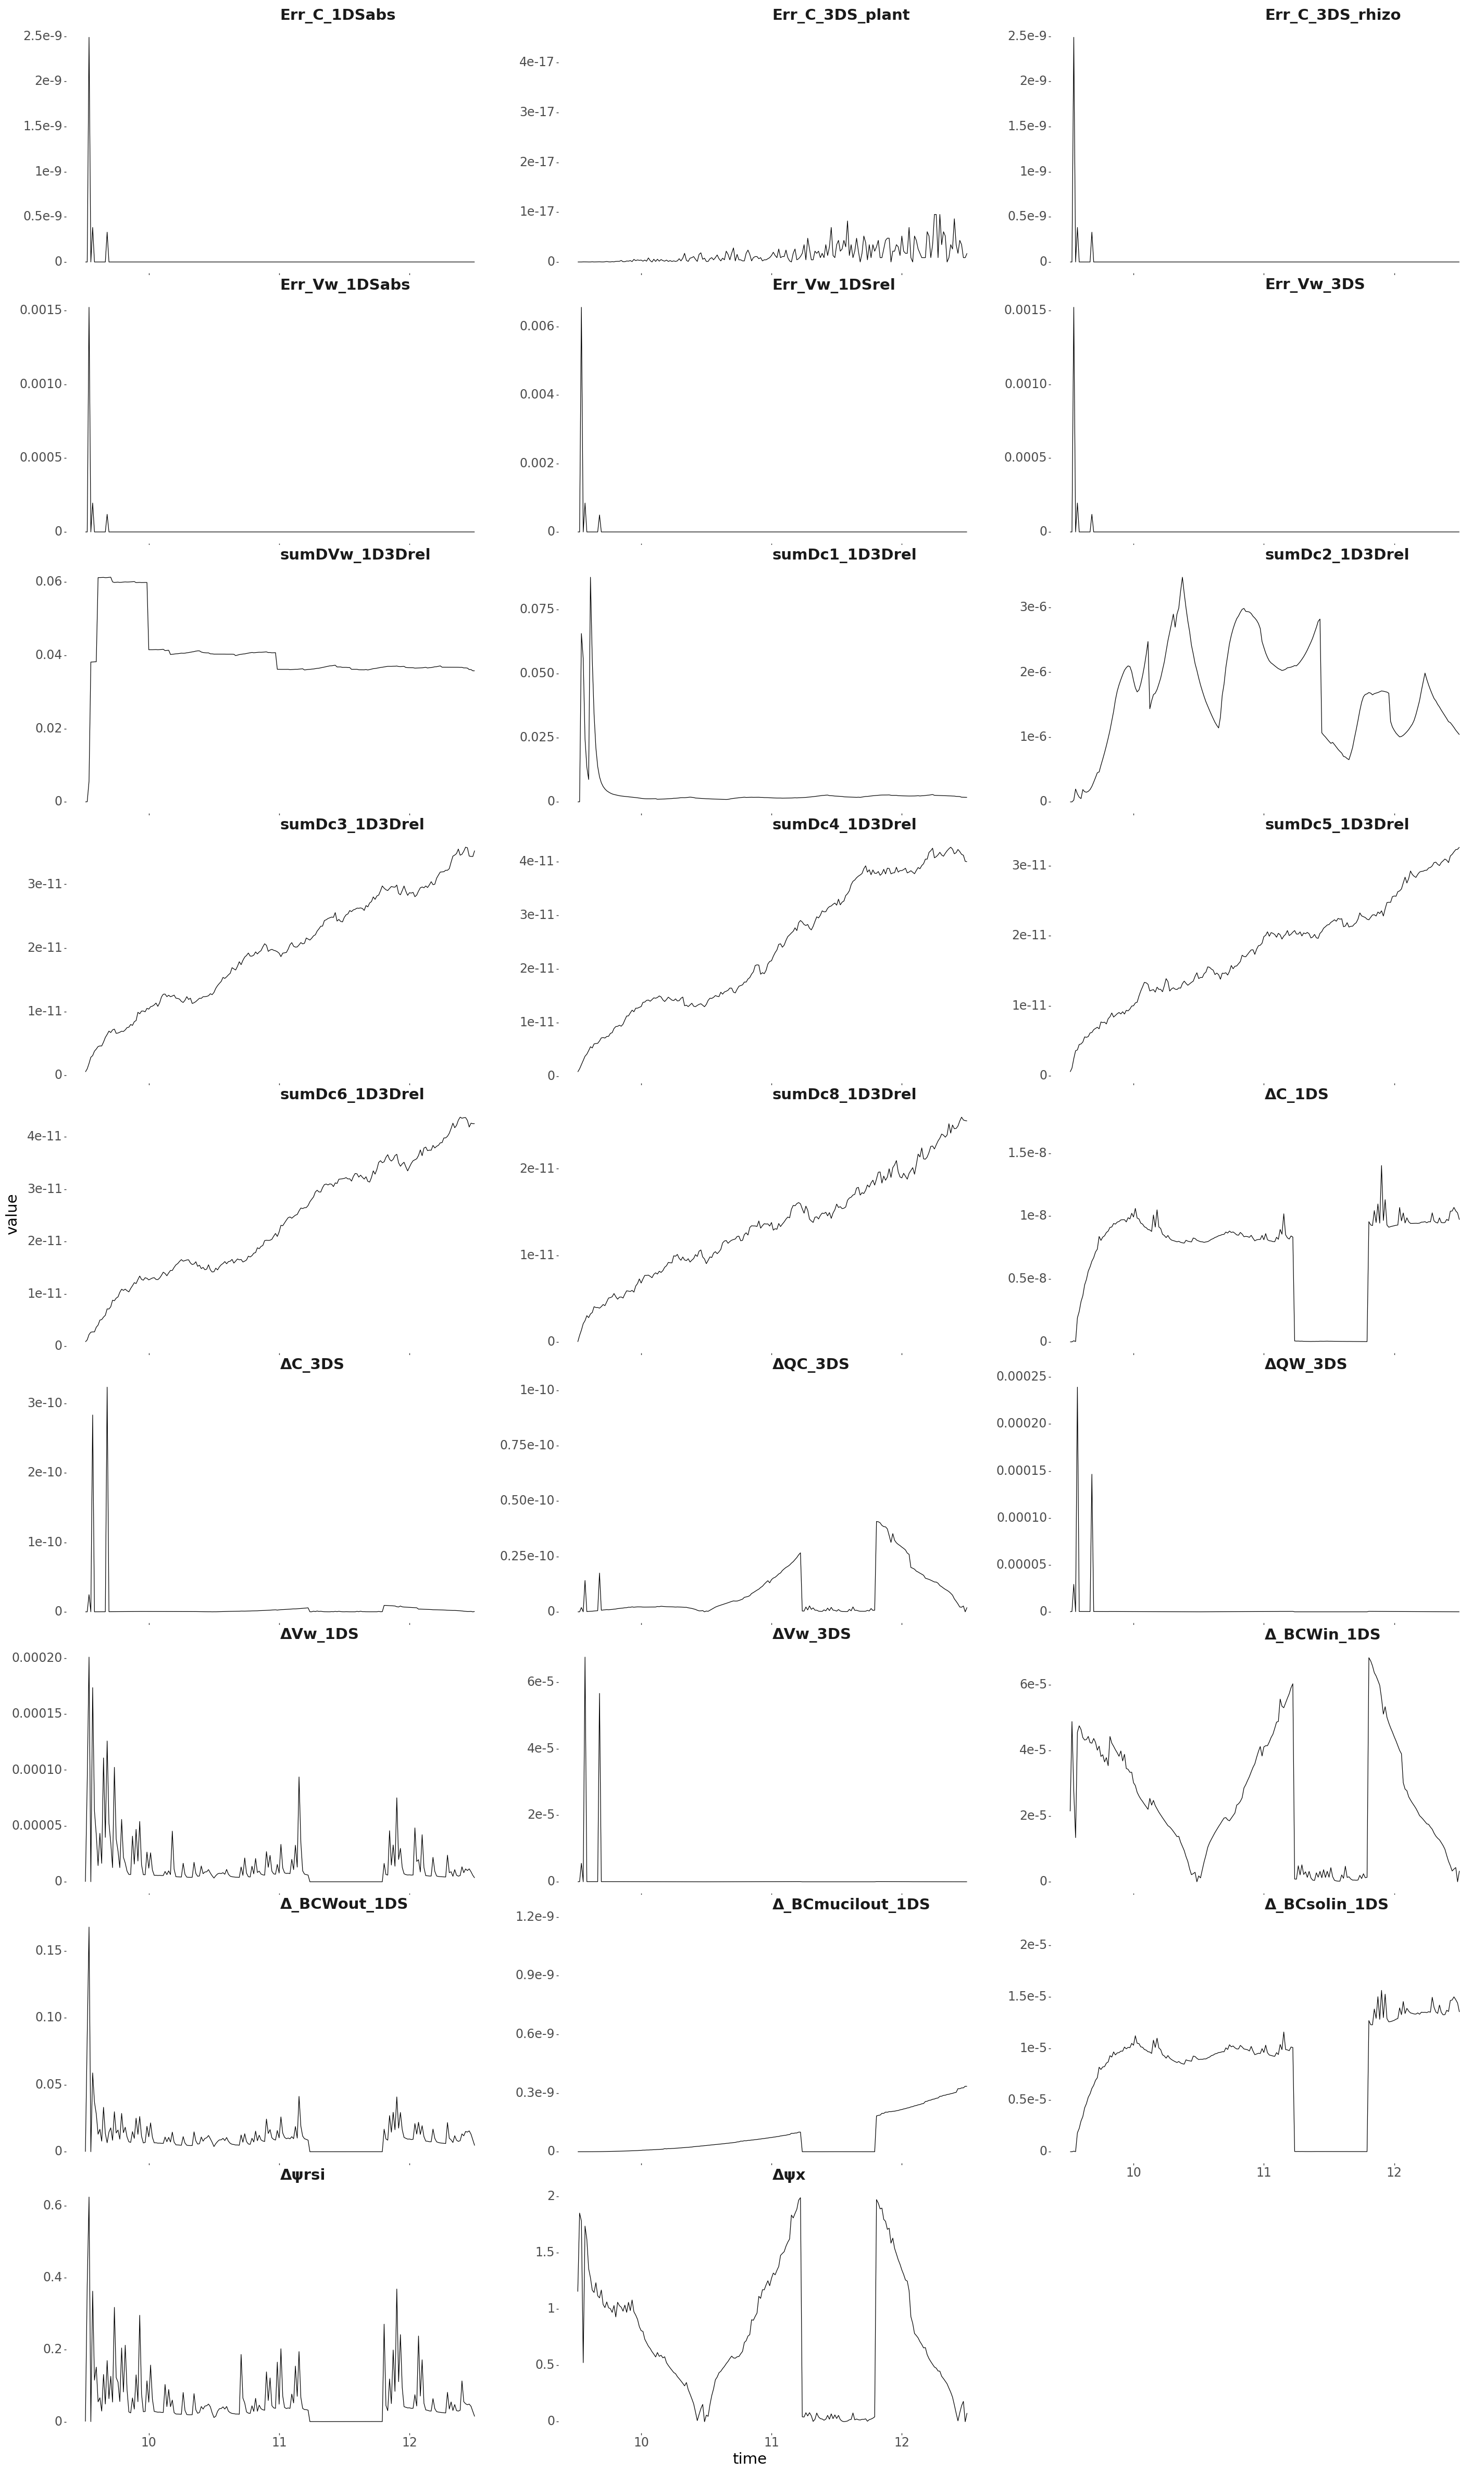

In [67]:
getImage(hW95, 'hW95err_20mn.png')

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 216 rows containing missing values.


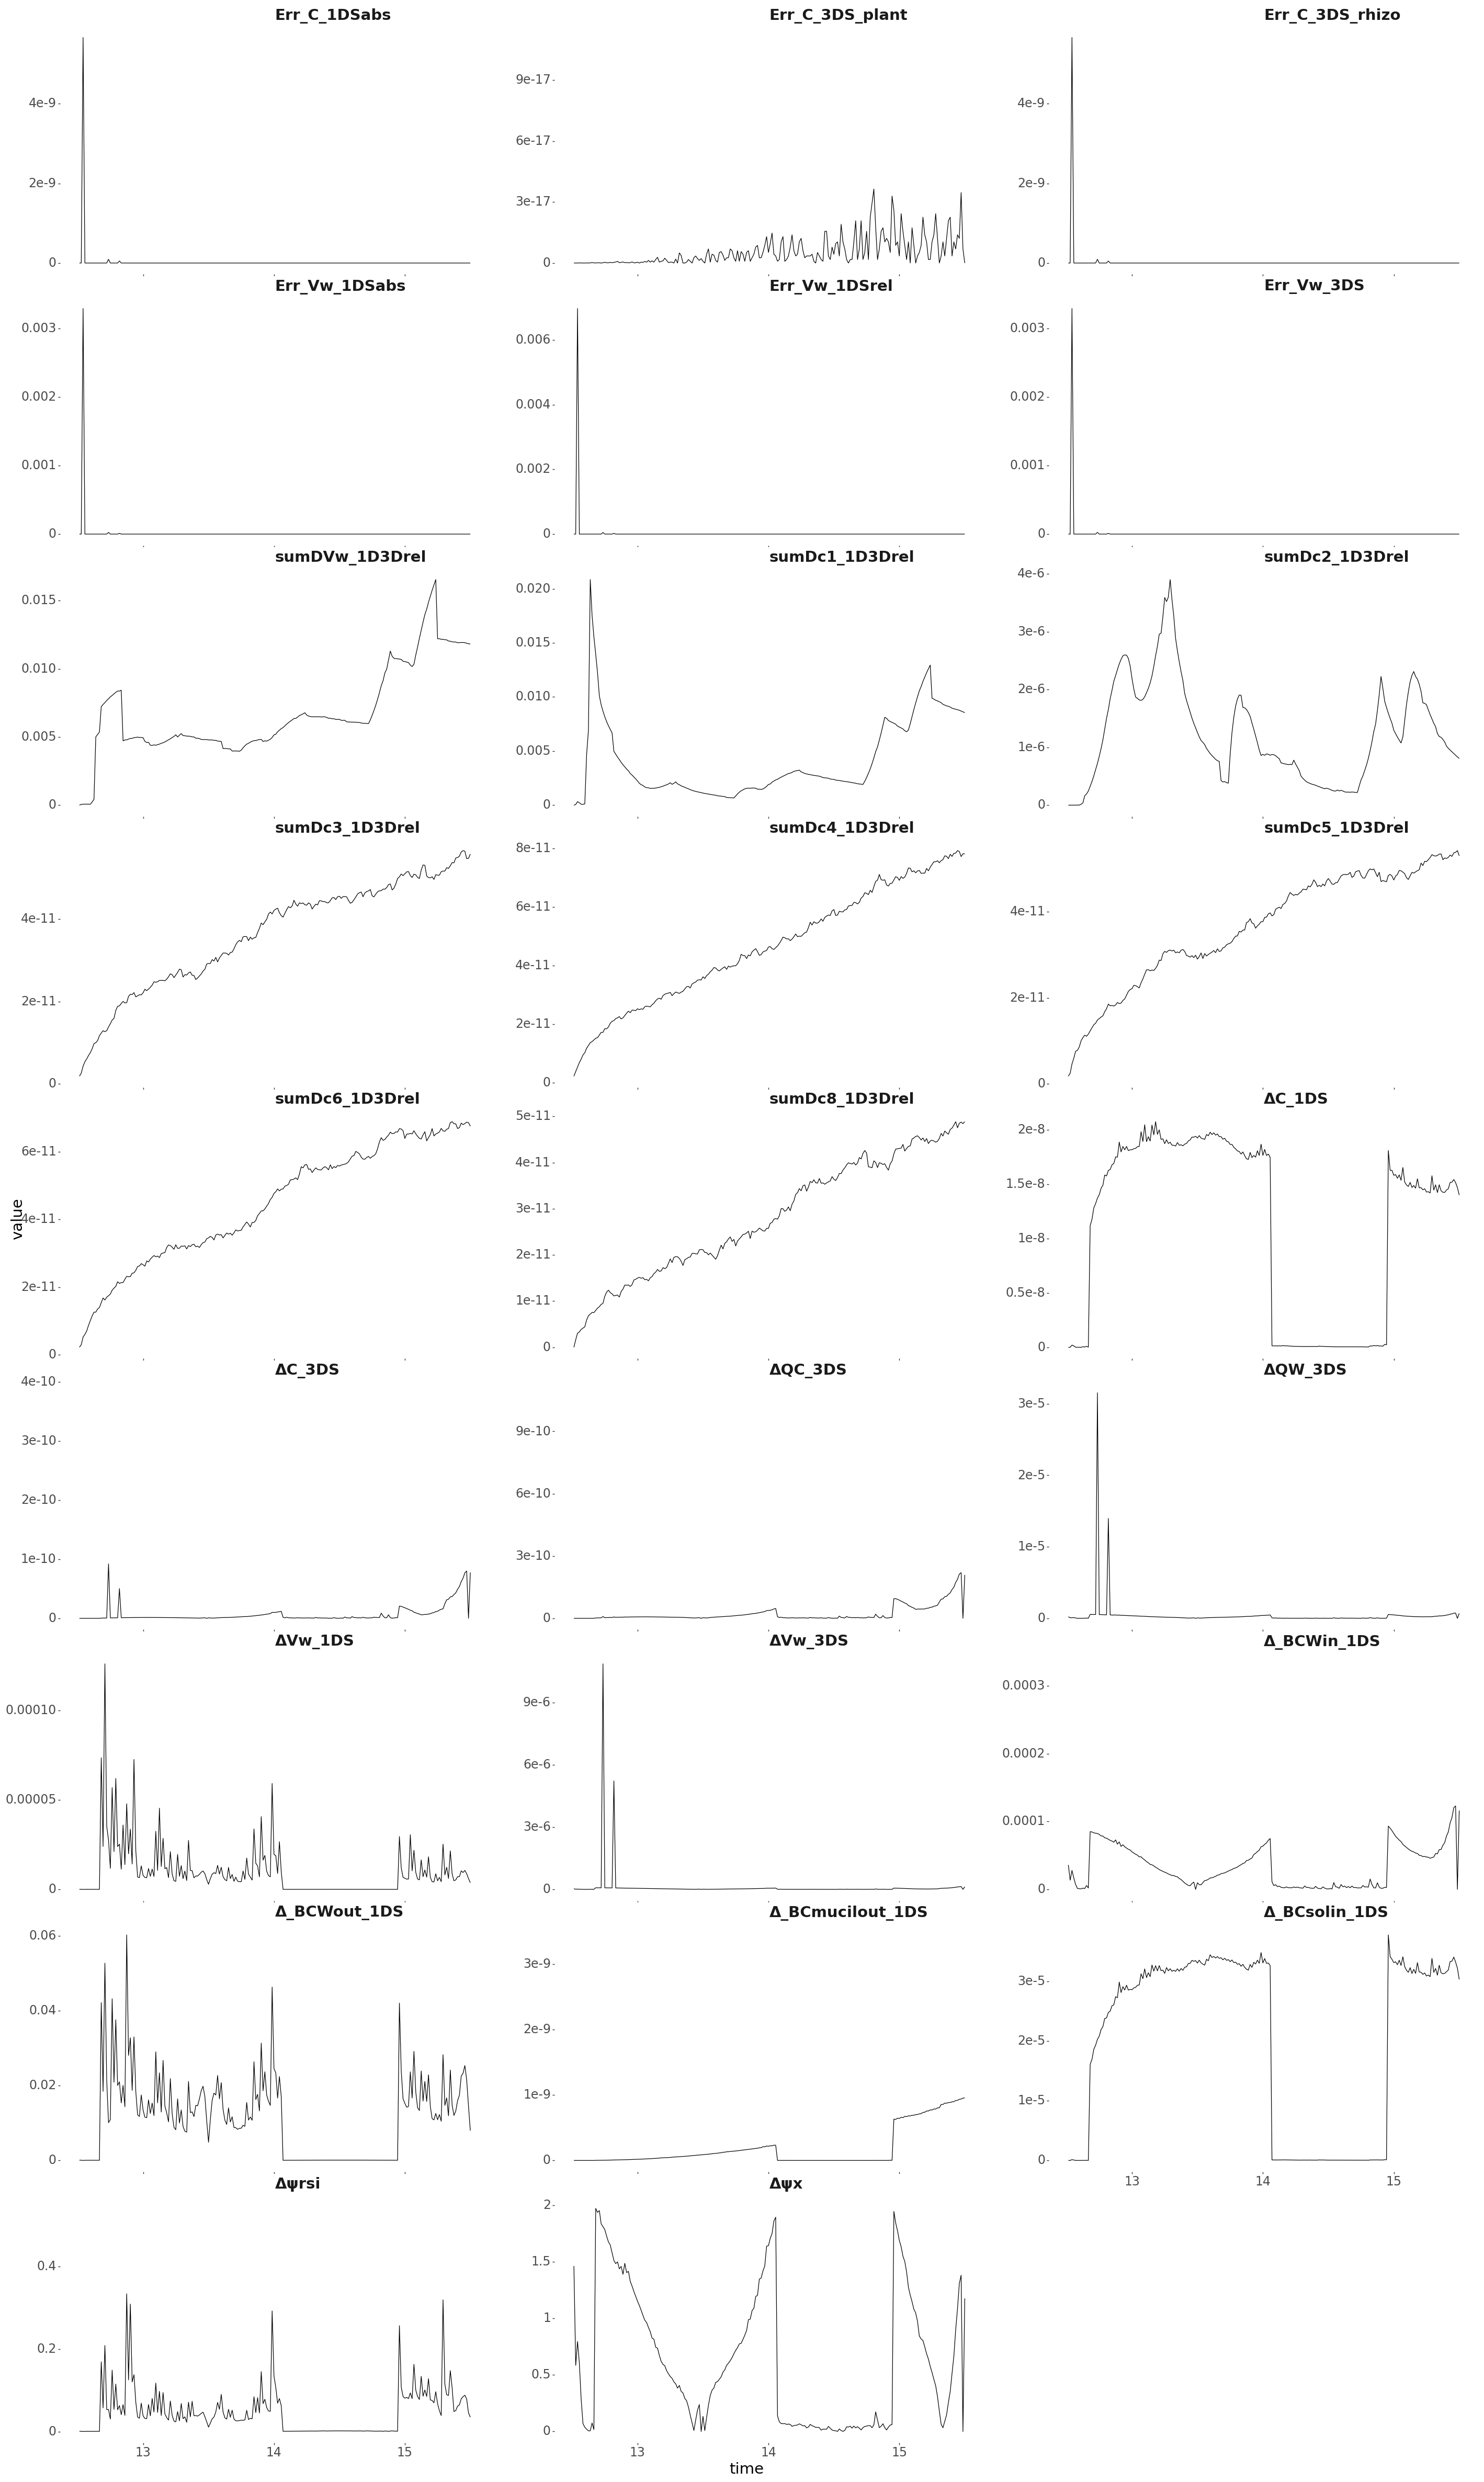

In [69]:
getImage(lW95B, 'hW125err_20mn.png')

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 101 rows containing missing values.


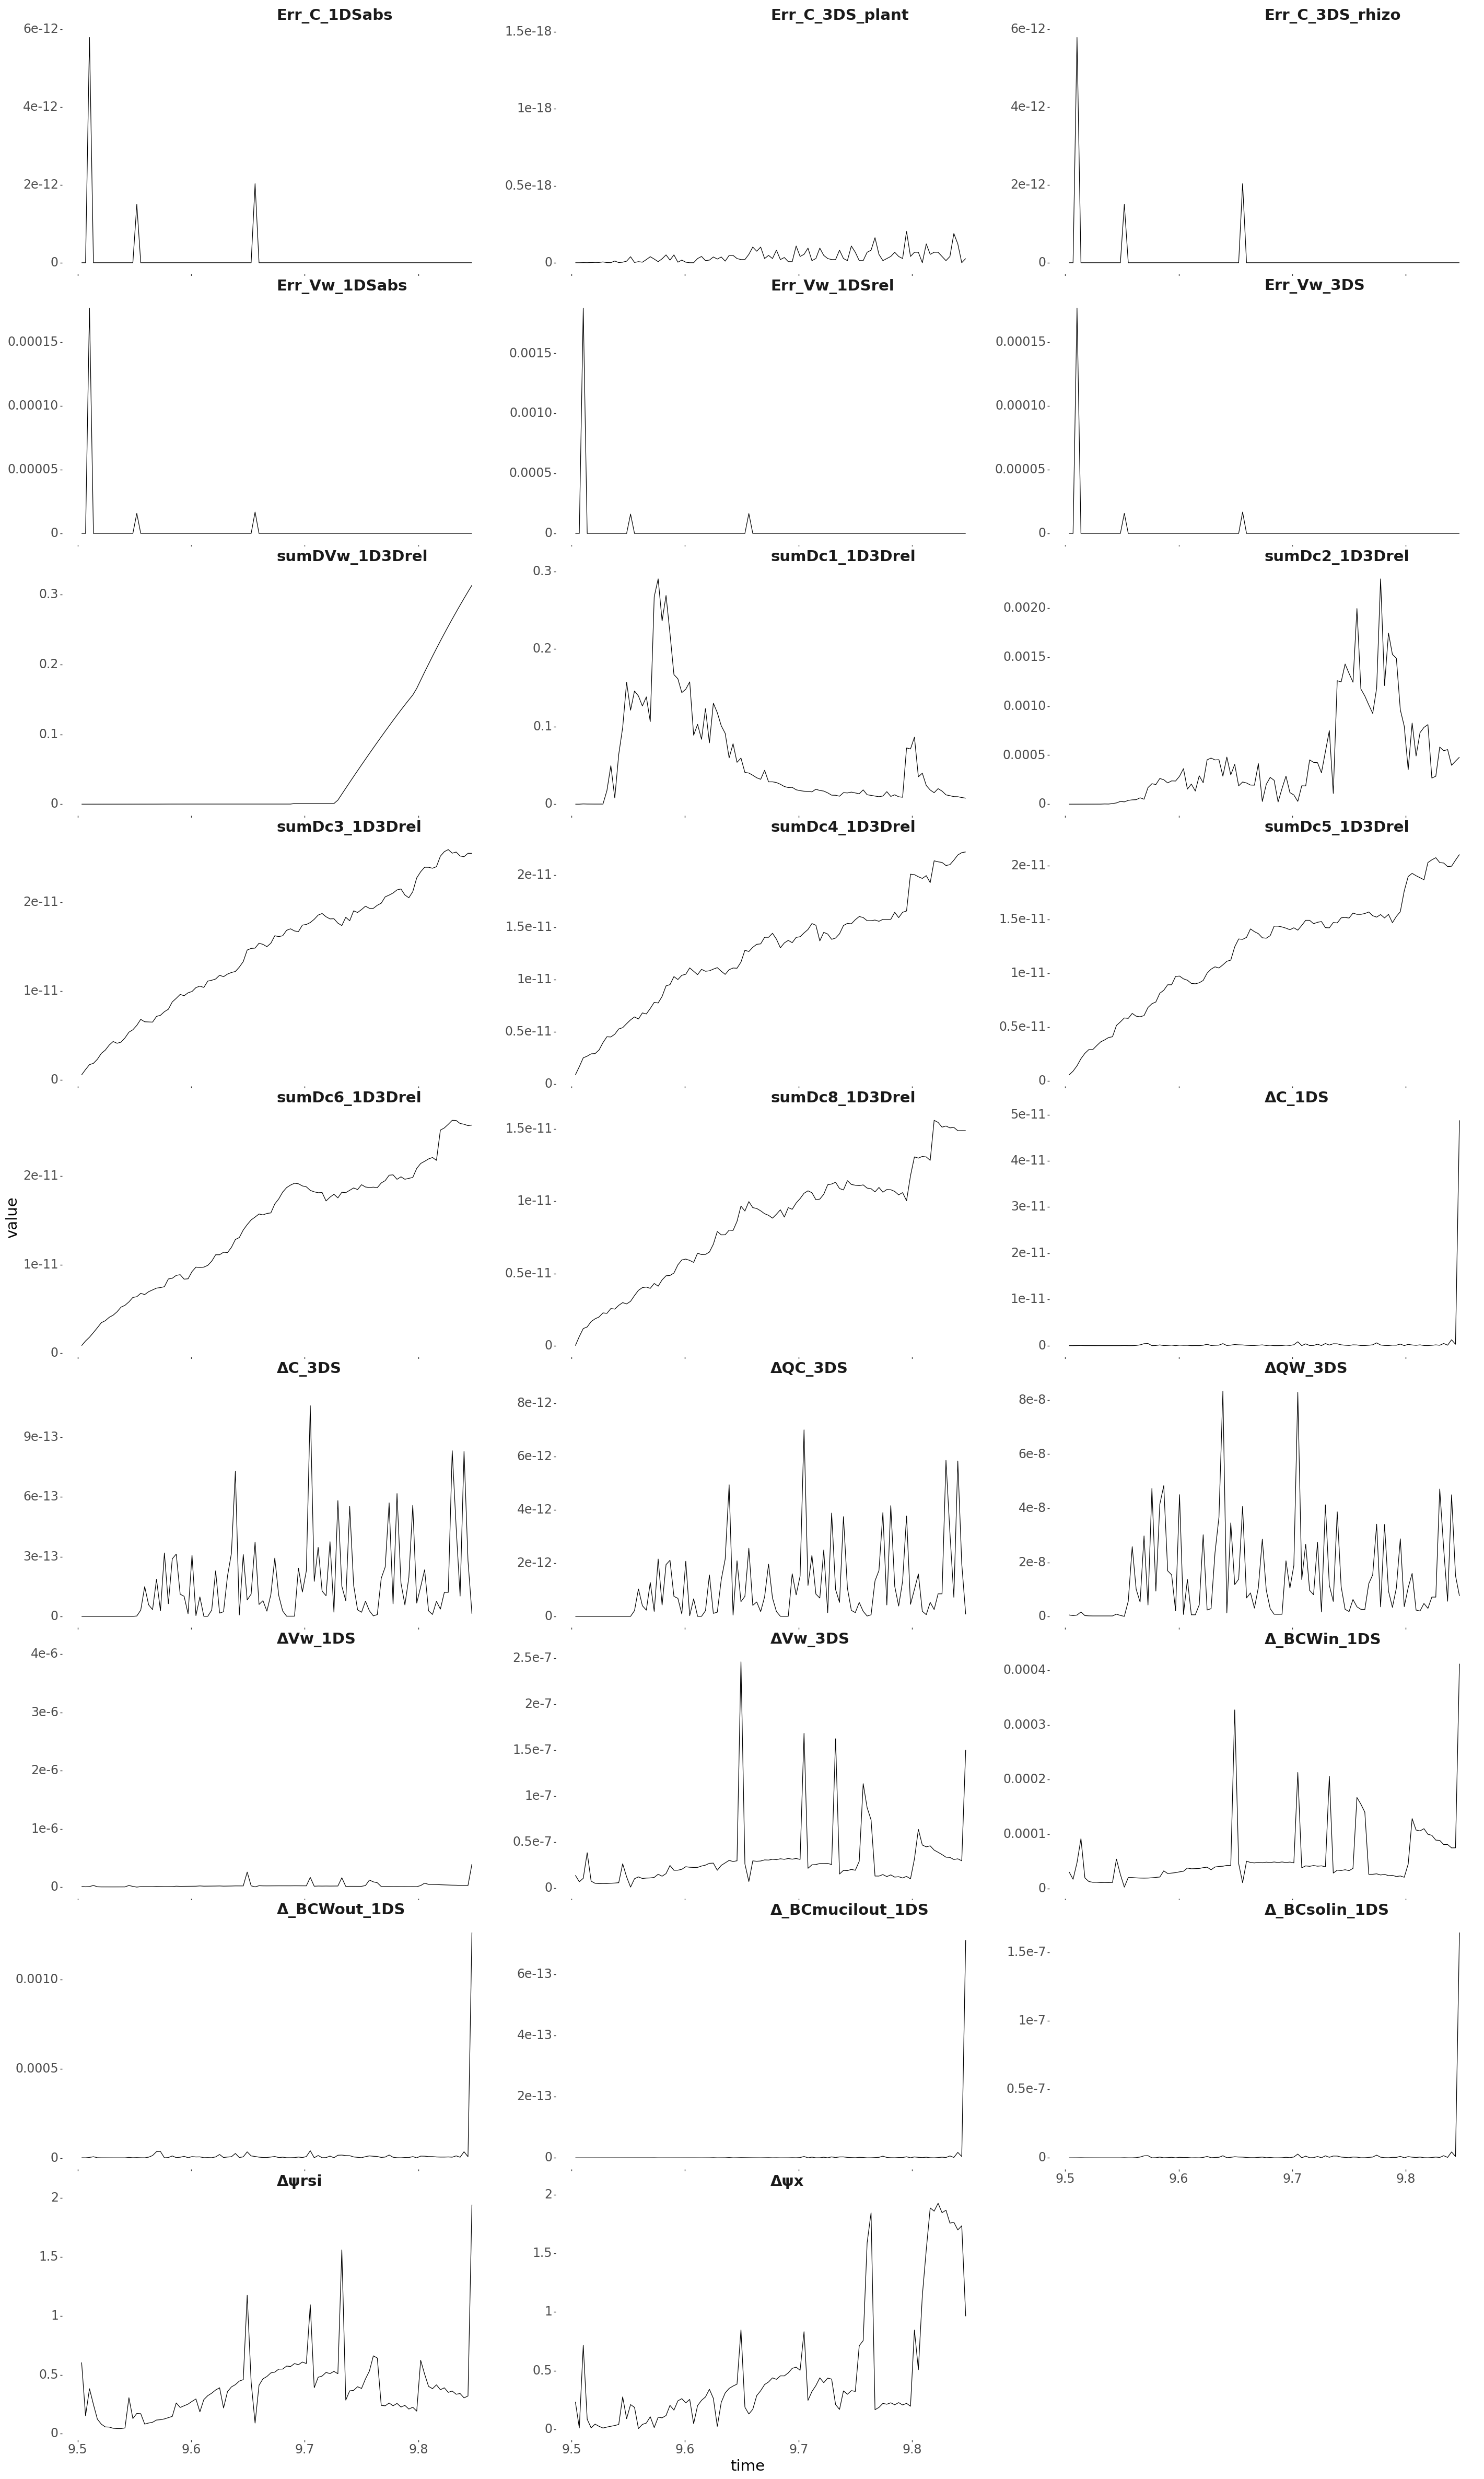

In [88]:
getImage(lW95BB, 'lW95err_5mn.png')

/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


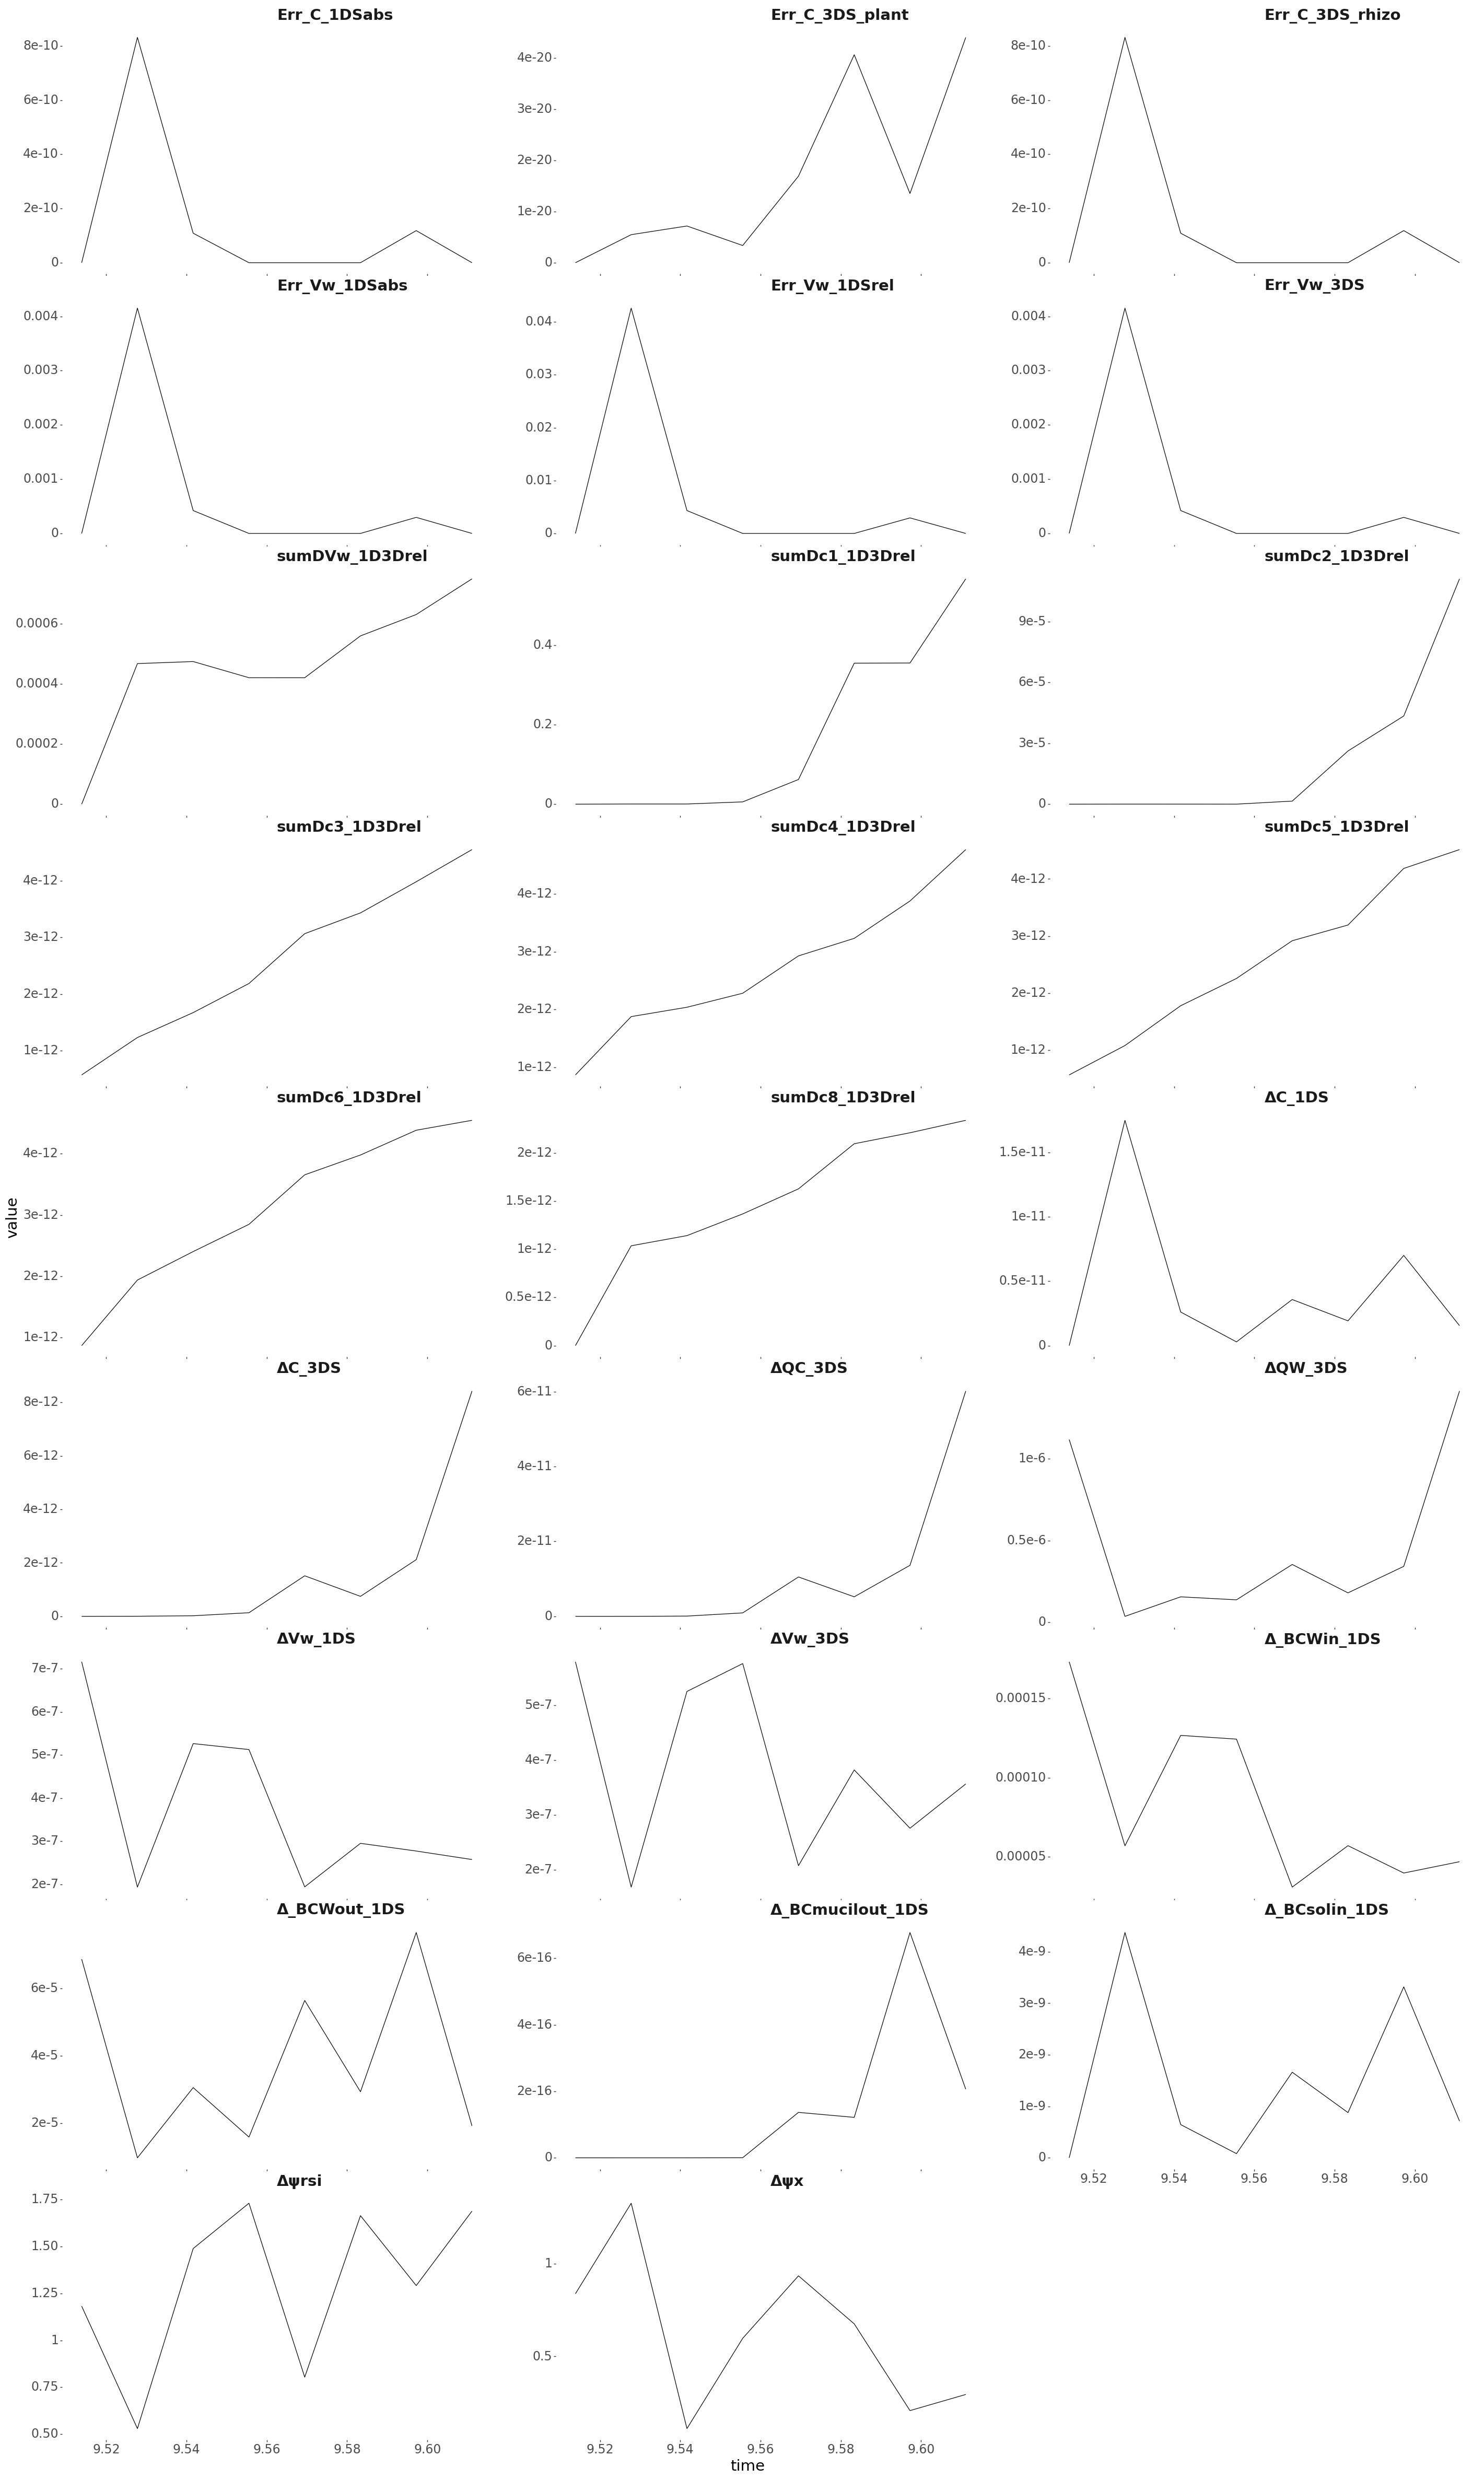

In [90]:
getImage(lW95CC,'lW95err_20mn.png')

In [22]:
npphead = phead.tail(1).to_numpy()[0]


array([-865.04791716, -865.04247658, -865.02873185, -865.00230914,
       -864.9565242 , -864.8811541 , -864.76055081, -864.57074941,
       -864.27508303])

In [78]:
lW95BB

'failedLoopdumux_10c9.5_5mn_0s_1_1000/'

In [86]:
maxdiffhead = 0
mindiffhead = 0
for i in range(240):
    try:
        phead  = getVal('failedLoopdumux_10c9.5_1mn_0s_1_1000/',"pressureHeadcyl"+str(i)+".txt" )
    except:
        pass
    npphead = phead.tail(1).to_numpy()[0]
    diffhead = (npphead[-1] - npphead[0])
    if diffhead > maxdiffhead:
        maxdiffhead = diffhead
    if diffhead < mindiffhead:
        mindiffhead = diffhead

In [87]:
print(maxdiffhead,mindiffhead)

273.9909530995078 -61.22812156643772


In [28]:
maxdiffhead = 0
for i in range(240):
    try:
        phead  = getVal("hangsdumux_wdx00010plant20k_9.5_30mn_0s_1_1000/","pressureHeadcyl"+str(i)+".txt" )
    except:
        pass
    npphead = phead.tail(1).to_numpy()[0]
    diffhead = abs(npphead[-1] - npphead[0])
    if diffhead > maxdiffhead:
        maxdiffhead = diffhead
maxdiffhead

313.49652907441646